In [5]:
from matplotlib import pyplot as plt
import os
import pickle
import random
import seaborn as sns
import pandas as pd                                 #Procesamiento de datos.
import numpy as np                                  #Álgebra lineal.
import math                                         #Para calcular función piso y techo.
import seaborn as sns
seed=42
random.seed(seed)
np.random.seed(seed)

from sklearn import model_selection 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import SMOTE, RandomOverSampler

In [6]:
# Cargar los datos
datos = pd.read_excel('BASE_CALIFICADA_VAR_COMPLETA.xlsx', sheet_name='Sheet1')
#list(datos.columns)

In [2]:
df = pd.read_excel('EXPERIMENTO.xlsx')
print(len(df))
df = pd.DataFrame(df)

df2 = pd.read_excel('CALIFICAR_ABRIL_JULIO.xlsx')
df2 = pd.DataFrame(df2)

df_credito=pd.read_excel('FECHA_DESEMBOLSO.xlsx')

df= pd.merge(df, df_credito[['CREDITO', 'FECHA_DESEMBOLSO']], on='CREDITO', how='left')
df2= pd.merge(df2, df_credito[['CREDITO', 'FECHA_DESEMBOLSO']], on='CREDITO', how='left')
#df = pd.read_excel('BASE_INTERACCIONES.xlsx')
#print(len(df))
#df = pd.DataFrame(df)

#df2 = pd.read_excel('BASE_INTERACCIONES_CALIF2.xlsx')
#df2 = pd.DataFrame(df2)
#print(len(df2))

FileNotFoundError: [Errno 2] No such file or directory: 'EXPERIMENTO.xlsx'

In [7]:
variables=['EVENTO', 'ACTIVOS_TOTAL_3',
 'ANTIGUEDAD_NEGOCIO_1',
 'ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1',
 'CIIU_2_GENERO_1',
 'CIUDAD_1_ACTIVOS_TOTAL_1',
 'CIUDAD_1_TIPO_VIVIENDA_3',
 'CIUDAD_1_TOTAL_PASIVOS_1',
 'CIUDAD_3_EDAD_3',
 'CIUDAD_3_TIPO_VINCULACION_1',
 'EDAD_2_TIPO_VINCULACION_1',
 'EDAD_3_TIPO_VINCULACION_1',
 'ESTADO_CIVIL_1',
 'ESTADO_CIVIL_1_TIPO_VINCULACION_1',
 'SCORE_1',
 'SCORE_3',
 'SCORE_4',
 'TIPO_VIVIENDA_1',
 'TIPO_VIVIENDA_3',
 'TOTAL_PASIVOS_1',
 #'TOTAL_PASIVOS_1_ACTIVOS_TOTAL_1',
 'TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2']

lista=['EVENTO', 'ACTIVOS_TOTAL_3',
 'ANTIGUEDAD_NEGOCIO_1',
 'ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1',
 'CIIU_2_GENERO_1',
 'CIUDAD_1_ACTIVOS_TOTAL_1',
 'CIUDAD_1_TIPO_VIVIENDA_3',
 'CIUDAD_1_TOTAL_PASIVOS_1',
 'CIUDAD_3_EDAD_3',
 'CIUDAD_3_TIPO_VINCULACION_1',
 'EDAD_2_TIPO_VINCULACION_1',
 'EDAD_3_TIPO_VINCULACION_1',
 'ESTADO_CIVIL_1',
 'ESTADO_CIVIL_1_TIPO_VINCULACION_1',
 'SCORE_1',
 'SCORE_3',
 'SCORE_4',
 'TIPO_VIVIENDA_1',
 'TIPO_VIVIENDA_3',
 'TOTAL_PASIVOS_1',
 #'TOTAL_PASIVOS_1_ACTIVOS_TOTAL_1',
 'TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2']

In [ ]:
#Solo cuando vaya a concatenar correr este código
df1=df[variables]
df3=df2[variables]

df_concatenado = pd.concat([df1, df3], axis=0)
df1=df_concatenado

In [8]:
#Solo si no va a concatenar
df1=datos[variables]

In [9]:
# Obtener los nombres de las columnas como una lista
nombres_columnas = list(df1.columns)

In [10]:
nombres_columnas

['EVENTO',
 'ACTIVOS_TOTAL_3',
 'ANTIGUEDAD_NEGOCIO_1',
 'ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1',
 'CIIU_2_GENERO_1',
 'CIUDAD_1_ACTIVOS_TOTAL_1',
 'CIUDAD_1_TIPO_VIVIENDA_3',
 'CIUDAD_1_TOTAL_PASIVOS_1',
 'CIUDAD_3_EDAD_3',
 'CIUDAD_3_TIPO_VINCULACION_1',
 'EDAD_2_TIPO_VINCULACION_1',
 'EDAD_3_TIPO_VINCULACION_1',
 'ESTADO_CIVIL_1',
 'ESTADO_CIVIL_1_TIPO_VINCULACION_1',
 'SCORE_1',
 'SCORE_3',
 'SCORE_4',
 'TIPO_VIVIENDA_1',
 'TIPO_VIVIENDA_3',
 'TOTAL_PASIVOS_1',
 'TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2']

In [11]:
df1

,EVENTO,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,CIUDAD_3_EDAD_3,CIUDAD_3_TIPO_VINCULACION_1,...,EDAD_3_TIPO_VINCULACION_1,ESTADO_CIVIL_1,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2
0,0,1,1,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,1,1,0,0,0,0,1,1,...,1,1,1,0,1,0,1,0,1,0
2,0,1,1,1,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,0,0,1,1,0,0,0,0,1,1,...,1,0,0,0,0,0,0,1,0,0
20311,0,0,1,1,0,1,0,0,0,0,...,0,1,1,0,1,0,1,0,0,0
20312,0,0,1,1,1,0,0,0,1,1,...,1,1,1,0,1,0,1,0,1,0
20313,0,0,0,0,1,0,0,0,0,1,...,0,1,1,0,1,0,0,1,1,0


In [12]:
cualis=lista
#scaler = MinMaxScaler()
#scaler.fit(df1[cuantis])
#df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])
    
print(df1['EVENTO'].value_counts())

X=df1.drop(columns=["EVENTO"])
y=df1["EVENTO"]

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['EVENTO'], random_state=seed)

0    14681
1     5634
Name: EVENTO, dtype: int64


C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2826379757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = labelencoder.fit_transform(df1[i])
C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2826379757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = labelencoder.fit_transform(df1[i])
C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2826379757.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

In [13]:
print(len(train))
print(len(test))

16252
4063


In [14]:
print(train['EVENTO'].value_counts())
print(test['EVENTO'].value_counts())

0    11745
1     4507
Name: EVENTO, dtype: int64
0    2936
1    1127
Name: EVENTO, dtype: int64


In [15]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val, y_pred_labels):
    accuracy = accuracy_score(y_val, y_pred_labels)
    precision = precision_score(y_val, y_pred_labels)
    recall = recall_score(y_val, y_pred_labels)
    f1 = round(f1_score(y_val, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val, y_pred_labels)*100,2)
    logloss = round(log_loss(y_val, y_pred_labels),2)
    conf_matrix = confusion_matrix(y_val, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc,logloss

In [16]:
num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

# Crear directorio para guardar los modelos si no existe
save_dir = 'saved_model0/Logistic/'
os.makedirs(save_dir, exist_ok=True)

matrixLogistic=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)
    
    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train, y_val = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    model=LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred_proba=model.predict(X_val)
    threshold=0.5 #Umbral de clasificación
    y_pred_labels= np.where(y_pred_proba>=threshold,1,0)
    
    cm=confusion_matrix(y_val, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    
    accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_val, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

    matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
    
    with open(f'saved_model0/Logistic/{fold_no}.model', 'wb') as file:
        pickle.dump(model, file)
    
    fold_no +=1

print(matrixLogistic)

matrixLogistic.describe().loc['mean']

C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2342202292.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2342202292.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2342202292.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2342202292.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC  Log_Loss
0  72.02  27.98  11.60  95.64  50.96  4.36  18.89    53.62     10.09
1  72.39  27.61  12.63  96.46  59.00  3.54  20.81    54.55      9.95
2  74.40  25.60  15.59  94.70  50.39  5.30  23.81    55.14      9.23
3  72.25  27.75  13.76  95.20  52.94  4.80  21.84    54.48     10.00
4  72.86  27.14  12.25  96.00  53.92  4.00  19.96    54.13      9.78
5  71.94  28.06  13.04  95.19  51.72  4.81  20.83    54.12     10.11
6  73.85  26.15  13.86  96.12  57.01  3.88  22.30    54.99      9.43
7  72.86  27.14  11.61  96.18  53.61  3.82  19.08    53.89      9.78
8  71.14  28.86   9.68  95.78  47.87  4.22  16.10    52.73     10.40
9  72.86  27.14  14.35  95.00  52.03  5.00  22.50    54.67      9.78


C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2342202292.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2342202292.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)


Acc         72.657
Err         27.343
Re          12.837
Sp          95.627
Pre         52.945
FPR          4.373
F1          20.612
ROC_AUC     54.232
Log_Loss     9.855
Name: mean, dtype: float64

In [17]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif = vif.sort_values(by='VIF', ascending=False)

print("Valores VIF ordenados de mayor a menor:")
print(vif)

Valores VIF ordenados de mayor a menor:
                                   Variable       VIF
2   ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1  4.696646
10                EDAD_3_TIPO_VINCULACION_1  4.655832
18                          TOTAL_PASIVOS_1  3.970264
6                  CIUDAD_1_TOTAL_PASIVOS_1  3.804801
17                          TIPO_VIVIENDA_3  3.453410
1                      ANTIGUEDAD_NEGOCIO_1  3.325359
5                  CIUDAD_1_TIPO_VIVIENDA_3  3.190016
11                           ESTADO_CIVIL_1  2.699287
12        ESTADO_CIVIL_1_TIPO_VINCULACION_1  2.497635
4                  CIUDAD_1_ACTIVOS_TOTAL_1  2.331786
16                          TIPO_VIVIENDA_1  2.231150
9                 EDAD_2_TIPO_VINCULACION_1  2.206641
14                                  SCORE_3  2.045437
8               CIUDAD_3_TIPO_VINCULACION_1  1.939509
7                           CIUDAD_3_EDAD_3  1.858989
19  TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2  1.649097
13                                  SCORE_

In [18]:
weights = pd.Series(model.coef_[0], index=X.columns.values)
print("Weights for each variables is a follows...")
print(weights)

Weights for each variables is a follows...
ACTIVOS_TOTAL_3                           -0.519242
ANTIGUEDAD_NEGOCIO_1                      -0.192735
ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1    0.130507
CIIU_2_GENERO_1                            0.256483
CIUDAD_1_ACTIVOS_TOTAL_1                   0.221388
CIUDAD_1_TIPO_VIVIENDA_3                  -0.193223
CIUDAD_1_TOTAL_PASIVOS_1                   0.163710
CIUDAD_3_EDAD_3                           -0.251654
CIUDAD_3_TIPO_VINCULACION_1                0.204473
EDAD_2_TIPO_VINCULACION_1                 -0.771067
EDAD_3_TIPO_VINCULACION_1                 -0.693584
ESTADO_CIVIL_1                             0.174691
ESTADO_CIVIL_1_TIPO_VINCULACION_1         -0.195023
SCORE_1                                    0.238612
SCORE_3                                   -0.440209
SCORE_4                                   -0.901839
TIPO_VIVIENDA_1                           -0.209934
TIPO_VIVIENDA_3                            0.326910
TOTAL_PASIVOS_1      

In [19]:
num_folds=5
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

# Crear directorio para guardar los modelos si no existe
save_dir = 'saved_model10/Logistic/'
os.makedirs(save_dir, exist_ok=True)

matrixLogistic=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)
    
    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train, y_val = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    model=LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred_proba=model.predict(X_val)
    threshold=0.5 #Umbral de clasificación
    y_pred_labels= np.where(y_pred_proba>=threshold,1,0)
    
    cm=confusion_matrix(y_val, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    
    accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_val, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

    matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
    
    with open(f'saved_model10/Logistic/{fold_no}.model', 'wb') as file:
        pickle.dump(model, file)
    
    fold_no +=1

print(matrixLogistic)

matrixLogistic.describe().loc['mean']

C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2821500234.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2821500234.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2821500234.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2821500234.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.conca

     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC  Log_Loss
0  72.22  27.78  12.34  96.00  55.07  4.00  20.16    54.17     10.01
1  73.24  26.76  15.89  94.36  50.92  5.64  24.22    55.12      9.65
2  72.37  27.63  12.21  95.73  52.61  4.27  19.82    53.97      9.96
3  73.32  26.68  12.84  96.06  55.07  3.94  20.82    54.45      9.62
4  71.94  28.06  11.96  95.30  49.77  4.70  19.29    53.63     10.11


C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\2821500234.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)


Acc         72.618
Err         27.382
Re          13.048
Sp          95.490
Pre         52.688
FPR          4.510
F1          20.862
ROC_AUC     54.268
Log_Loss     9.870
Name: mean, dtype: float64

In [20]:
num_folds=2
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

# Crear directorio para guardar los modelos si no existe
save_dir = 'saved_model30/Logistic/'
os.makedirs(save_dir, exist_ok=True)

matrixLogistic=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)
    
    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train, y_val = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    model=LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)
    
    y_pred_proba=model.predict(X_val)
    threshold=0.5 #Umbral de clasificación
    y_pred_labels= np.where(y_pred_proba>=threshold,1,0)
    
    cm=confusion_matrix(y_val, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    
    accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_val, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

    matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
    
    with open(f'saved_model30/Logistic/{fold_no}.model', 'wb') as file:
        pickle.dump(model, file)
    
    fold_no +=1

print(matrixLogistic)

matrixLogistic.describe().loc['mean']

C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\1242132398.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)
C:\Users\MathStath\AppData\Local\Temp\ipykernel_7784\1242132398.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  matrixLogistic=matrixLogistic.append(matrix,ignore_index=True)


     Acc    Err     Re     Sp    Pre   FPR     F1  ROC_AUC  Log_Loss
0  72.82  27.18  11.84  96.12  53.85  3.88  19.41    53.98      9.80
1  72.63  27.37  13.54  95.40  53.12  4.60  21.58    54.47      9.86


Acc         72.725
Err         27.275
Re          12.690
Sp          95.760
Pre         53.485
FPR          4.240
F1          20.495
ROC_AUC     54.225
Log_Loss     9.830
Name: mean, dtype: float64

### Validando el modelo

In [22]:
from matplotlib import pyplot as plt
import pickle
import random
import seaborn as sns
import pandas as pd                                 #Procesamiento de datos.
import numpy as np                                  #Álgebra lineal.
import math                                         #Para calcular función piso y techo.
import seaborn as sns
seed=42
random.seed(seed)
np.random.seed(seed)

from sklearn import model_selection 
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

#from imblearn.under_sampling import RandomUnderSampler
#from imblearn.over_sampling import SMOTE, RandomOverSampler

In [23]:
model_path_1 = f'saved_model0/Logistic/1.model'
model_path_2 = f'saved_model0/Logistic/2.model'
model_path_3 = f'saved_model0/Logistic/3.model'
model_path_4 = f'saved_model0/Logistic/4.model'
model_path_5 = f'saved_model0/Logistic/5.model'
model_path_6 = f'saved_model0/Logistic/6.model'
model_path_7 = f'saved_model0/Logistic/7.model'
model_path_8 = f'saved_model0/Logistic/8.model'
model_path_9 = f'saved_model0/Logistic/9.model'
model_path_10 = f'saved_model0/Logistic/10.model'

with open(model_path_1, 'rb') as file:
    model_1 = pickle.load(file)
with open(model_path_2, 'rb') as file:
    model_2 = pickle.load(file)
with open(model_path_3, 'rb') as file:
    model_3 = pickle.load(file)
with open(model_path_4, 'rb') as file:
    model_4 = pickle.load(file)
with open(model_path_5, 'rb') as file:
    model_5 = pickle.load(file)
with open(model_path_6, 'rb') as file:
    model_6 = pickle.load(file)
with open(model_path_7, 'rb') as file:
    model_7 = pickle.load(file)
with open(model_path_8, 'rb') as file:
    model_8 = pickle.load(file)
with open(model_path_9, 'rb') as file:
    model_9 = pickle.load(file)
with open(model_path_10, 'rb') as file:
    model_10 = pickle.load(file)

In [24]:
#Solo para calificar toda la base
X_test = X
y_test = y
proba=0.5

In [25]:
X_test = train.drop(columns=["EVENTO"])
y_test = train["EVENTO"]
proba=0.5

In [26]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6+y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [27]:
betas_1 = model_1.coef_[0]
betas_2 = model_2.coef_[0]
betas_3 = model_3.coef_[0]
betas_4 = model_4.coef_[0]
betas_5 = model_5.coef_[0]
betas_6 = model_6.coef_[0]
betas_7 = model_7.coef_[0]
betas_8 = model_8.coef_[0]
betas_9 = model_9.coef_[0]
betas_10 = model_10.coef_[0]

prom_beta=(betas_1+betas_2+betas_3+betas_4+betas_5+betas_6+betas_7+betas_8+betas_9+betas_10)/10

intercepto_1 = model_1.intercept_[0]
intercepto_2 = model_2.intercept_[0]
intercepto_3 = model_3.intercept_[0]
intercepto_4 = model_4.intercept_[0]
intercepto_5 = model_5.intercept_[0]
intercepto_6 = model_6.intercept_[0]
intercepto_7 = model_7.intercept_[0]
intercepto_8 = model_8.intercept_[0]
intercepto_9 = model_9.intercept_[0]
intercepto_10 = model_10.intercept_[0]

prom_interc=(intercepto_1+intercepto_2+intercepto_3+intercepto_4+intercepto_5+intercepto_6+intercepto_7+intercepto_8+intercepto_9+intercepto_10)/10



print("Coeficientes del modelo (betas):\n", prom_beta)
print("\n")
print("Intercepto:\n", prom_interc)

Coeficientes del modelo (betas):
 [-0.54900517 -0.16610055  0.07922443  0.25343153  0.20728136 -0.2177484
  0.18067211 -0.25688348  0.19632955 -0.73154354 -0.67908454  0.18325143
 -0.21146279  0.24720358 -0.43861096 -0.90986457 -0.21486796  0.34668998
 -0.2133247  -0.10168088]


Intercepto:
 -0.51143852915343


In [28]:
variables=list(X_test.columns)
betas = pd.DataFrame({"Variable": variables, "Beta": prom_beta})

In [29]:
betas.sort_values(by='Beta')

,Variable,Beta
15,SCORE_4,-0.909865
9,EDAD_2_TIPO_VINCULACION_1,-0.731544
10,EDAD_3_TIPO_VINCULACION_1,-0.679085
0,ACTIVOS_TOTAL_3,-0.549005
14,SCORE_3,-0.438611
7,CIUDAD_3_EDAD_3,-0.256883
5,CIUDAD_1_TIPO_VIVIENDA_3,-0.217748
16,TIPO_VIVIENDA_1,-0.214868
18,TOTAL_PASIVOS_1,-0.213325
12,ESTADO_CIVIL_1_TIPO_VINCULACION_1,-0.211463


In [ ]:
#betas.to_excel('Betas_prop.xlsx', index=False)

In [30]:
y_pred_proba

array([0.43795393, 0.17231389, 0.30853601, ..., 0.11358909, 0.46624068,
       0.39404982])

In [31]:
X_test

,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,CIUDAD_3_EDAD_3,CIUDAD_3_TIPO_VINCULACION_1,EDAD_2_TIPO_VINCULACION_1,EDAD_3_TIPO_VINCULACION_1,ESTADO_CIVIL_1,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2
6920,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
1617,0,1,1,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,1,0
6664,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0
16506,0,1,1,0,1,1,0,0,0,0,1,1,1,0,1,0,0,1,0,0
8391,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19771,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1
18816,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
19275,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,1
11073,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [32]:
y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6+y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10
y_pred_labels = (y_pred_proba > proba).astype(int)

In [33]:
y_pred_proba_1

array([0.43875114, 0.17413801, 0.31408947, ..., 0.11304719, 0.46714763,
       0.39760192])

In [34]:
y_pred_labels

array([0, 0, 0, ..., 0, 0, 0])

In [35]:
#Solo para calificar toda la base
X_test['Probabilidad']=y_pred_proba

In [36]:
X_test

,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,CIUDAD_3_EDAD_3,CIUDAD_3_TIPO_VINCULACION_1,EDAD_2_TIPO_VINCULACION_1,...,ESTADO_CIVIL_1,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,Probabilidad
6920,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.437954
1617,0,1,1,0,1,0,1,0,0,0,...,1,1,0,1,0,0,0,1,0,0.172314
6664,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0.308536
16506,0,1,1,0,1,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0.196579
8391,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0.489783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19771,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0.142086
18816,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.326172
19275,1,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0.113589
11073,0,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.466241


In [ ]:
df = df.rename(columns={'IDENTIFICACION.x': 'IDENTIFICACION'})

In [ ]:
variables=['CREDITO','IDENTIFICACION','EVENTO', 'ACTIVOS_TOTAL_3',
 'ANTIGUEDAD_NEGOCIO_1',
 'ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1',
 'CIIU_2_GENERO_1',
 'CIUDAD_1_ACTIVOS_TOTAL_1',
 'CIUDAD_1_TIPO_VIVIENDA_3',
 'CIUDAD_1_TOTAL_PASIVOS_1',
 'CIUDAD_3_EDAD_3',
 'CIUDAD_3_TIPO_VINCULACION_1',
 'EDAD_2_TIPO_VINCULACION_1',
 'EDAD_3_TIPO_VINCULACION_1',
 'ESTADO_CIVIL_1',
 'ESTADO_CIVIL_1_TIPO_VINCULACION_1',
 'SCORE_1',
 'SCORE_3',
 'SCORE_4',
 'TIPO_VIVIENDA_1',
 'TIPO_VIVIENDA_3',
 'TOTAL_PASIVOS_1',
 #'TOTAL_PASIVOS_1_ACTIVOS_TOTAL_1',
 'TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2']

In [38]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val, y_pred_labels):
    accuracy = accuracy_score(y_val, y_pred_labels)
    precision = precision_score(y_val, y_pred_labels)
    recall = recall_score(y_val, y_pred_labels)
    f1 = round(f1_score(y_val, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val, y_pred_labels)*100,2)
    logloss = round(log_loss(y_val, y_pred_labels),2)
    conf_matrix = confusion_matrix(y_val, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc,logloss

In [39]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [40]:
matrix

{'Acc': 72.67,
 'Err': 27.33,
 'Re': 12.67,
 'Sp': 95.69,
 'Pre': 53.02,
 'FPR': 4.31,
 'F1': 20.45,
 'ROC_AUC': 54.18,
 'Log_Loss': 9.85}

<Axes: >

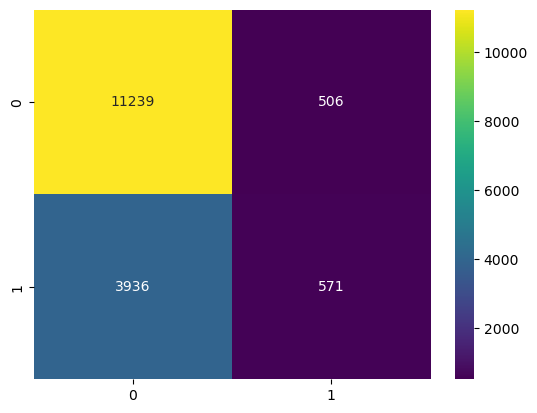

In [41]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [42]:
X_test

,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,CIUDAD_3_EDAD_3,CIUDAD_3_TIPO_VINCULACION_1,EDAD_2_TIPO_VINCULACION_1,...,ESTADO_CIVIL_1,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,Probabilidad
6920,0,1,0,1,1,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0.437954
1617,0,1,1,0,1,0,1,0,0,0,...,1,1,0,1,0,0,0,1,0,0.172314
6664,0,0,0,0,1,0,1,0,0,0,...,1,0,0,1,0,1,0,1,0,0.308536
16506,0,1,1,0,1,1,0,0,0,0,...,1,1,0,1,0,0,1,0,0,0.196579
8391,0,0,0,1,0,0,0,0,0,0,...,1,0,1,0,0,0,0,1,0,0.489783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19771,1,1,0,0,0,0,0,0,0,0,...,1,0,0,1,0,1,0,0,1,0.142086
18816,0,1,0,0,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0.326172
19275,1,1,0,0,0,0,0,1,0,0,...,1,0,0,1,0,1,0,0,1,0.113589
11073,0,1,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0.466241


In [43]:
X_test2 = X_test

In [44]:
X_test2["puntaje"] = y_pred_proba
X_test2["EVENTO"] = y_test.values

In [209]:
#X_test2[X_test2['ESTADO_CIVIL_2:TOTAL_INVENTARIO_2'] == 1][:1].transpose()

In [45]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [46]:
df_output

,V1,puntaje,EVENTO
6920,1,0.437954,1
1617,2,0.172314,0
6664,3,0.308536,0
16506,4,0.196579,0
8391,5,0.489783,1
...,...,...,...
19771,16248,0.142086,1
18816,16249,0.326172,0
19275,16250,0.113589,0
11073,16251,0.466241,0


In [47]:
print(df_output['EVENTO'].value_counts())

0    11745
1     4507
Name: EVENTO, dtype: int64


In [48]:
deciles = np.percentile(y_pred_proba, [10,20,30,40,50,60,70,80,90,100])
#deciles = np.percentile(y_pred_proba, [20,40,60,80,100])
inferior=0
superior=1
deciles = np.append(inferior,deciles)
deciles[-1]=superior
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [49]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [50]:
df_resultado

,Min,Max,0,1,total
0,0.471603,1.000000,798,829,1627
1,0.409677,0.471603,928,706,1634
2,0.355288,0.409677,980,647,1627
3,0.306985,0.355288,1071,542,1613
4,0.258913,0.306985,1171,471,1642
5,0.219088,0.258913,1242,386,1628
6,0.181571,0.219088,1289,319,1608
7,0.147276,0.181571,1376,251,1627
8,0.114986,0.147276,1411,213,1624
9,0.000000,0.114986,1479,143,1622


In [51]:
deciles

array([0.        , 0.11498571, 0.14727611, 0.18157093, 0.21908788,
       0.25891251, 0.30698539, 0.35528827, 0.40967676, 0.47160332,
       1.        ])

In [216]:
deciles_train_06=deciles

### Validación Test

In [217]:
X_test = test.drop(columns=["EVENTO"])
y_test = test["EVENTO"]

In [218]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6+y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [219]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [220]:
matrix

{'Acc': 72.74,
 'Err': 27.26,
 'Re': 11.26,
 'Sp': 96.15,
 'Pre': 52.68,
 'FPR': 3.85,
 'F1': 18.55,
 'ROC_AUC': 53.7,
 'Log_Loss': 9.41}

<AxesSubplot:>

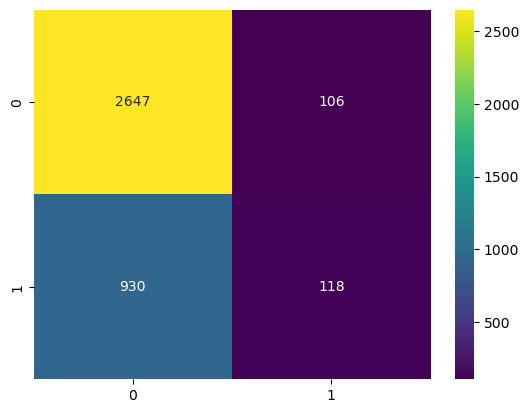

In [221]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [222]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [223]:
df_output

,V1,puntaje,EVENTO
9156,1,0.229090,0
15017,2,0.330596,1
1807,3,0.171584,0
17987,4,0.449152,1
16056,5,0.354372,1
...,...,...,...
10780,3797,0.301977,1
13058,3798,0.448948,1
6806,3799,0.481970,0
11785,3800,0.271246,1


In [224]:
#df_output.to_csv("C:/Users/damartinezp/Documents/Proyectos Borrador/PD_C1/202205_modelo/datos_salida_10_Logistic_TEST.csv")

In [225]:
deciles_train_06=deciles

In [226]:
print(df_output['EVENTO'].value_counts())

0    2753
1    1048
Name: EVENTO, dtype: int64


In [227]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [229]:
df_resultado

,Min,Max,0,1,total
0,0.471510,1.000000,166,179,345
1,0.409767,0.471510,222,186,408
2,0.350522,0.409767,244,147,391
3,0.302862,0.350522,282,117,399
4,0.257959,0.302862,261,100,361
5,0.217171,0.257959,303,93,396
6,0.181207,0.217171,323,82,405
7,0.145792,0.181207,299,56,355
8,0.111651,0.145792,310,51,361
9,0.000000,0.111651,343,37,380


### Calificación Abril a Julio

In [410]:
df=cruce_valor_credito[cruce_valor_credito['FECHA_DESEMBOLSO'] >= '2023-04-01']

In [411]:
df

,CREDITO,IDENTIFICACION,EVENTO,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,...,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,VALOR_CREDITO,FECHA_DESEMBOLSO,PROBABILIDAD
19005,00000080000098494,64718772,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,3480000.0,2023-04-12,0.321840
19006,00000080000098500,6887422,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,3500000.0,2023-04-11,0.236061
19007,00000080000098501,25879044,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,6300000.0,2023-04-11,0.173047
19008,00000080000098502,1006387426,1,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,5000000.0,2023-04-12,0.346458
19009,00000080000098506,29844979,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,7600000.0,2023-04-12,0.167004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,00000080000100093,60325189,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,4833000.0,2023-07-18,0.258320
20311,00000080000100094,1032396944,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,35000000.0,2023-07-18,0.148490
20312,00000080000100096,12127192,0,0,1,1,1,0,0,0,...,0,1,0,1,0,1,0,5760000.0,2023-07-19,0.121587
20313,00000080000100097,1007417614,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,8000000.0,2023-07-18,0.246932


In [317]:
import pyreadstat as pyr
# Cargar el archivo .sas7bdat
data_comport, meta = pyr.read_sas7bdat('comite_micro.sas7bdat')

In [318]:
data_comport

,CREDITO,FECHA_DESEMBOLSO,IDENTIFICACION,VALOR_CREDITO,MES,MES2,DIAS_SISTEMA202101,DIAS_SISTEMA202102,DIAS_SISTEMA202103,DIAS_SISTEMA202104,...,BHR_DIAS_SISTEMA_AFT_M10,BHR_DIAS_SISTEMA_AFT_M11,BHR_DIAS_SISTEMA_AFT_M12,diff,Mad,MAX_MORA_12M,Categoria_desempeno,BR_30_12M,BR_60_12M,BR_90_12M
0,00000080000068173,2021-01-06,3.857060e+05,22500000.0,202101.0,202101.0,0.0,0.0,0.0,0.0,...,12.0,0.0,0.0,42.0,12.0,13.0,Completo,0.0,0.0,0.0
1,00000080000068191,2021-01-06,1.887719e+06,6000000.0,202101.0,202101.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,42.0,12.0,0.0,Completo,0.0,0.0,0.0
2,00000080000069037,2021-01-29,6.105282e+06,6450000.0,202101.0,202101.0,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,42.0,1.0,0.0,Incompleto,NaN,NaN,NaN
3,00000080000068360,2021-01-15,6.794052e+06,7700000.0,202101.0,202101.0,0.0,0.0,25.0,0.0,...,147.0,179.0,210.0,42.0,12.0,210.0,Completo,1.0,1.0,1.0
4,00000080000068234,2021-01-08,6.801870e+06,4300000.0,202101.0,202101.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,42.0,12.0,0.0,Completo,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28797,00000080000100124,2023-08-01,1.110489e+09,13500000.0,202308.0,202308.0,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,11.0,11.0,0.0,Incompleto,NaN,NaN,NaN
28798,00000080000100121,2023-08-01,1.110555e+09,4950000.0,202308.0,202308.0,NaN,NaN,NaN,NaN,...,0.0,30.0,NaN,11.0,11.0,30.0,Incompleto,NaN,NaN,NaN
28799,00000080000100116,2023-08-01,1.117547e+09,3500000.0,202308.0,202308.0,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,11.0,11.0,0.0,Incompleto,NaN,NaN,NaN
28800,00000080000100199,2023-08-01,1.125179e+09,11000000.0,202308.0,202308.0,NaN,NaN,NaN,NaN,...,0.0,0.0,NaN,11.0,11.0,0.0,Incompleto,NaN,NaN,NaN


In [320]:
df

,CREDITO,IDENTIFICACION,EVENTO,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,...,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,VALOR_CREDITO,FECHA_DESEMBOLSO
19005,00000080000098494,64718772,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,3480000.0,2023-04-12
19006,00000080000098500,6887422,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,3500000.0,2023-04-11
19007,00000080000098501,25879044,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,6300000.0,2023-04-11
19008,00000080000098502,1006387426,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,5000000.0,2023-04-12
19009,00000080000098506,29844979,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,7600000.0,2023-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,00000080000100093,60325189,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,4833000.0,2023-07-18
20311,00000080000100094,1032396944,0,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,0,35000000.0,2023-07-18
20312,00000080000100096,12127192,0,0,1,1,1,0,0,0,...,1,0,1,0,1,0,1,0,5760000.0,2023-07-19
20313,00000080000100097,1007417614,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,8000000.0,2023-07-18


In [327]:
exportar= pd.merge(df[['CREDITO', 'IDENTIFICACION','EVENTO','FECHA_DESEMBOLSO']], data_comport.iloc[:,[0] + list(range(31, 69))], on='CREDITO', how='left')

In [328]:
exportar

,CREDITO,IDENTIFICACION,EVENTO,FECHA_DESEMBOLSO,DIAS_SISTEMA202302,DIAS_SISTEMA202303,DIAS_SISTEMA202304,DIAS_SISTEMA202305,DIAS_SISTEMA202306,DIAS_SISTEMA202307,...,BHR_DIAS_SISTEMA_AFT_M10,BHR_DIAS_SISTEMA_AFT_M11,BHR_DIAS_SISTEMA_AFT_M12,diff,Mad,MAX_MORA_12M,Categoria_desempeno,BR_30_12M,BR_60_12M,BR_90_12M
0,00000080000098494,64718772,1,2023-04-12,NaN,NaN,0.0,0.0,0.0,19.0,...,109.0,140.0,170.0,15.0,12.0,170.0,Completo,1.0,1.0,1.0
1,00000080000098500,6887422,0,2023-04-11,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,12.0,0.0,Completo,0.0,0.0,0.0
2,00000080000098501,25879044,0,2023-04-11,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,12.0,0.0,Completo,0.0,0.0,0.0
3,00000080000098502,1006387426,1,2023-04-12,NaN,NaN,0.0,0.0,18.0,19.0,...,48.0,79.0,109.0,15.0,12.0,109.0,Completo,1.0,1.0,1.0
4,00000080000098506,29844979,0,2023-04-12,NaN,NaN,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,15.0,12.0,0.0,Completo,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,00000080000100093,60325189,0,2023-07-18,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,12.0,0.0,12.0,12.0,12.0,Completo,0.0,0.0,0.0
1306,00000080000100094,1032396944,0,2023-07-18,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,12.0,12.0,0.0,Completo,0.0,0.0,0.0
1307,00000080000100096,12127192,0,2023-07-19,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,12.0,12.0,12.0,Completo,0.0,0.0,0.0
1308,00000080000100097,1007417614,0,2023-07-18,NaN,NaN,NaN,NaN,NaN,0.0,...,0.0,0.0,0.0,12.0,12.0,0.0,Completo,0.0,0.0,0.0


In [329]:
exportar.to_excel('DATOS_COMPORT_EVENTO.xlsx', index=False)

In [310]:
df

,CREDITO,IDENTIFICACION,EVENTO,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,...,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,VALOR_CREDITO,FECHA_DESEMBOLSO
19005,00000080000098494,64718772,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,3480000.0,2023-04-12
19006,00000080000098500,6887422,0,0,1,0,0,0,0,0,...,0,0,1,0,1,0,0,0,3500000.0,2023-04-11
19007,00000080000098501,25879044,0,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,6300000.0,2023-04-11
19008,00000080000098502,1006387426,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,1,0,5000000.0,2023-04-12
19009,00000080000098506,29844979,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,7600000.0,2023-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,00000080000100093,60325189,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,4833000.0,2023-07-18
20311,00000080000100094,1032396944,0,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,0,35000000.0,2023-07-18
20312,00000080000100096,12127192,0,0,1,1,1,0,0,0,...,1,0,1,0,1,0,1,0,5760000.0,2023-07-19
20313,00000080000100097,1007417614,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,8000000.0,2023-07-18


In [232]:
df1 = df.iloc[:, 2:23]

In [233]:
cualis=lista
#scaler = MinMaxScaler()
#scaler.fit(df1[cuantis])
#df1[cuantis] = scaNestler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])
    
print(df1['EVENTO'].value_counts())

X_test = df1.drop(columns=["EVENTO"])
y_test = df1["EVENTO"]

0    914
1    396
Name: EVENTO, dtype: int64


In [234]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6+y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [235]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [236]:
matrix

{'Acc': 70.53,
 'Err': 29.47,
 'Re': 2.78,
 'Sp': 99.89,
 'Pre': 91.67,
 'FPR': 0.11,
 'F1': 5.39,
 'ROC_AUC': 51.33,
 'Log_Loss': 10.18}

<AxesSubplot:>

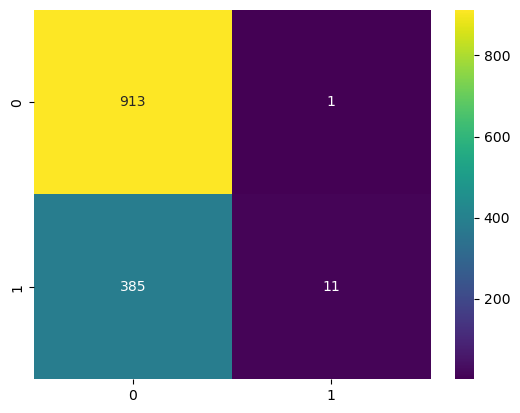

In [237]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [238]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [239]:
df_output

,V1,puntaje,EVENTO
19005,1,0.321840,1
19006,2,0.236061,0
19007,3,0.173047,0
19008,4,0.346458,1
19009,5,0.167004,0
...,...,...,...
20310,1306,0.258320,0
20311,1307,0.148490,0
20312,1308,0.121587,0
20313,1309,0.246932,0


In [240]:
#df_output.to_csv("C:/Users/damartinezp/Documents/Proyectos Borrador/PD_C1/202205_modelo/datos_salida_10_Logistic_TEST.csv")

In [241]:
deciles_train_06=deciles

In [242]:
print(df_output['EVENTO'].value_counts())

0    914
1    396
Name: EVENTO, dtype: int64


In [243]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [244]:
df_resultado

,Min,Max,0,1,total
0,0.471510,1.000000,5,25,30
1,0.409767,0.471510,36,41,77
2,0.350522,0.409767,44,43,87
3,0.302862,0.350522,62,53,115
4,0.257959,0.302862,74,39,113
5,0.217171,0.257959,92,53,145
6,0.181207,0.217171,100,32,132
7,0.145792,0.181207,142,51,193
8,0.111651,0.145792,182,32,214
9,0.000000,0.111651,177,27,204


### Meses individuales Abril a Mayo

In [294]:
df=cruce_valor_credito[(cruce_valor_credito['FECHA_DESEMBOLSO'] >= '2023-07-01') &
                         (cruce_valor_credito['FECHA_DESEMBOLSO'] < '2023-08-01')]

In [295]:
df

,CREDITO,IDENTIFICACION,EVENTO,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,...,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,VALOR_CREDITO,FECHA_DESEMBOLSO
20166,00000080000099921,78673873,0,1,1,1,0,0,0,0,...,0,0,1,0,1,0,0,1,21440000.0,2023-07-18
20216,00000080000099977,1112463057,0,0,1,1,0,0,0,0,...,1,0,1,0,0,0,1,0,9770000.0,2023-07-04
20219,00000080000099983,5670038,1,0,1,0,1,1,1,1,...,0,0,1,0,0,1,1,0,4000000.0,2023-07-05
20222,00000080000099987,64549432,0,1,1,0,0,0,0,0,...,0,0,0,0,1,0,0,1,11138000.0,2023-07-06
20231,00000080000099997,1018475127,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,1,10040000.0,2023-07-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,00000080000100093,60325189,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,4833000.0,2023-07-18
20311,00000080000100094,1032396944,0,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,0,35000000.0,2023-07-18
20312,00000080000100096,12127192,0,0,1,1,1,0,0,0,...,1,0,1,0,1,0,1,0,5760000.0,2023-07-19
20313,00000080000100097,1007417614,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,8000000.0,2023-07-18


In [296]:
df1=df[variables]
df1

,CREDITO,IDENTIFICACION,EVENTO,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,...,EDAD_3_TIPO_VINCULACION_1,ESTADO_CIVIL_1,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2
20166,00000080000099921,78673873,0,1,1,1,0,0,0,0,...,1,0,0,0,1,0,1,0,0,1
20216,00000080000099977,1112463057,0,0,1,1,0,0,0,0,...,0,1,1,0,1,0,0,0,1,0
20219,00000080000099983,5670038,1,0,1,0,1,1,1,1,...,0,1,0,0,1,0,0,1,1,0
20222,00000080000099987,64549432,0,1,1,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
20231,00000080000099997,1018475127,0,0,1,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,00000080000100093,60325189,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
20311,00000080000100094,1032396944,0,0,1,1,0,1,0,0,...,0,1,1,0,1,0,1,0,0,0
20312,00000080000100096,12127192,0,0,1,1,1,0,0,0,...,1,1,1,0,1,0,1,0,1,0
20313,00000080000100097,1007417614,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0


In [297]:
cualis=lista
#scaler = MinMaxScaler()
#scaler.fit(df1[cuantis])
#df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])
    
print(df1['EVENTO'].value_counts())

X_test = df1.drop(columns=["EVENTO","CREDITO","IDENTIFICACION"])
y_test = df1["EVENTO"]

0    74
1    14
Name: EVENTO, dtype: int64


C:\Users\damartinezp\AppData\Local\Temp\ipykernel_1288\1622489241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = labelencoder.fit_transform(df1[i])


In [298]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6+y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [299]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

C:\Users\damartinezp\AppData\Local\Temp\ipykernel_1288\1709042303.py:12: RuntimeWarning: invalid value encountered in scalar divide
  prec = round((TP / (TP + FP))*100,2)                          #Precision
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [300]:
matrix

{'Acc': 84.09,
 'Err': 15.91,
 'Re': 0.0,
 'Sp': 100.0,
 'Pre': nan,
 'FPR': 0.0,
 'F1': 0.0,
 'ROC_AUC': 50.0,
 'Log_Loss': 5.49}

<AxesSubplot:>

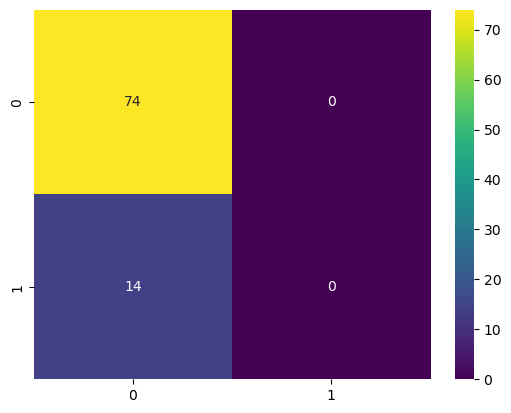

In [301]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [302]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [303]:
df_output

,V1,puntaje,EVENTO
20166,1,0.066476,0
20216,2,0.125421,0
20219,3,0.408122,1
20222,4,0.191395,0
20231,5,0.378929,0
...,...,...,...
20310,84,0.258320,0
20311,85,0.148490,0
20312,86,0.121587,0
20313,87,0.246932,0


In [304]:
#df_output.to_csv("C:/Users/damartinezp/Documents/Proyectos Borrador/PD_C1/202205_modelo/datos_salida_10_Logistic_TEST.csv")

In [305]:
deciles_train_06=deciles

In [306]:
print(df_output['EVENTO'].value_counts())

0    74
1    14
Name: EVENTO, dtype: int64


In [307]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [308]:
df_resultado

,Min,Max,0,1,total
0,0.471510,1.000000,0,0,0
1,0.409767,0.471510,0,1,1
2,0.350522,0.409767,1,1,2
3,0.302862,0.350522,1,0,1
4,0.257959,0.302862,4,1,5
5,0.217171,0.257959,10,5,15
6,0.181207,0.217171,7,0,7
7,0.145792,0.181207,11,2,13
8,0.111651,0.145792,22,2,24
9,0.000000,0.111651,18,2,20


## Calificar todo

In [333]:
df=cruce_valor_credito

In [334]:
df

,CREDITO,IDENTIFICACION,EVENTO,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,...,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,VALOR_CREDITO,FECHA_DESEMBOLSO
0,00000080000068188,93366264,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,1,21900000.0,2021-01-06
1,00000080000068192,13537087,0,0,1,1,0,0,0,0,...,1,0,1,0,1,0,1,0,1870000.0,2021-01-06
2,00000080000068193,35510406,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,1,4375000.0,2021-01-07
3,00000080000068195,40079073,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,1100000.0,2021-01-06
4,00000080000068196,40784068,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,2205000.0,2021-01-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,00000080000100093,60325189,0,0,1,1,0,0,0,0,...,0,0,0,0,0,1,0,0,4833000.0,2023-07-18
20311,00000080000100094,1032396944,0,0,1,1,0,1,0,0,...,1,0,1,0,1,0,0,0,35000000.0,2023-07-18
20312,00000080000100096,12127192,0,0,1,1,1,0,0,0,...,1,0,1,0,1,0,1,0,5760000.0,2023-07-19
20313,00000080000100097,1007417614,0,0,0,0,1,0,0,0,...,1,0,1,0,0,1,1,0,8000000.0,2023-07-18


In [335]:
df1=df[variables]
df1

,CREDITO,IDENTIFICACION,EVENTO,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,...,EDAD_3_TIPO_VINCULACION_1,ESTADO_CIVIL_1,ESTADO_CIVIL_1_TIPO_VINCULACION_1,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2
0,00000080000068188,93366264,0,1,1,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,00000080000068192,13537087,0,0,1,1,0,0,0,0,...,1,1,1,0,1,0,1,0,1,0
2,00000080000068193,35510406,0,1,1,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
3,00000080000068195,40079073,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
4,00000080000068196,40784068,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,00000080000100093,60325189,0,0,1,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
20311,00000080000100094,1032396944,0,0,1,1,0,1,0,0,...,0,1,1,0,1,0,1,0,0,0
20312,00000080000100096,12127192,0,0,1,1,1,0,0,0,...,1,1,1,0,1,0,1,0,1,0
20313,00000080000100097,1007417614,0,0,0,0,1,0,0,0,...,0,1,1,0,1,0,0,1,1,0


In [336]:
cualis=lista
#scaler = MinMaxScaler()
#scaler.fit(df1[cuantis])
#df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])
    
print(df1['EVENTO'].value_counts())

X_test = df1.drop(columns=["EVENTO","CREDITO","IDENTIFICACION"])
y_test = df1["EVENTO"]

0    14681
1     5634
Name: EVENTO, dtype: int64


C:\Users\damartinezp\AppData\Local\Temp\ipykernel_1288\1622489241.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[i] = labelencoder.fit_transform(df1[i])


In [337]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]
y_pred_proba_6 = model_6.predict_proba(X_test)[:,1]
y_pred_proba_7 = model_7.predict_proba(X_test)[:,1]
y_pred_proba_8 = model_8.predict_proba(X_test)[:,1]
y_pred_proba_9 = model_9.predict_proba(X_test)[:,1]
y_pred_proba_10 = model_10.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6+y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [338]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [339]:
matrix

{'Acc': 72.67,
 'Err': 27.33,
 'Re': 12.12,
 'Sp': 95.91,
 'Pre': 53.19,
 'FPR': 4.09,
 'F1': 19.75,
 'ROC_AUC': 54.01,
 'Log_Loss': 9.44}

<AxesSubplot:>

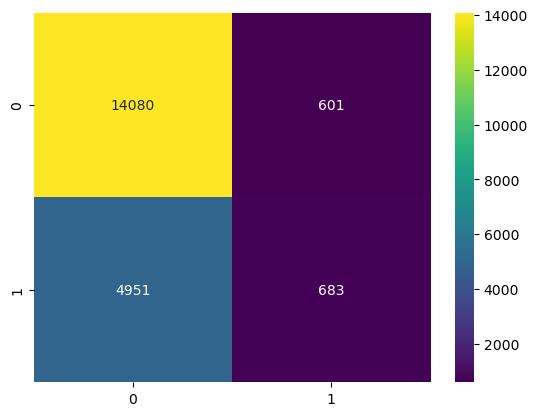

In [340]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [341]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [342]:
df_output

,V1,puntaje,EVENTO
0,1,0.154819,0
1,2,0.094200,0
2,3,0.099037,0
3,4,0.209211,0
4,5,0.334119,0
...,...,...,...
20310,20311,0.258320,0
20311,20312,0.148490,0
20312,20313,0.121587,0
20313,20314,0.246932,0


In [304]:
#df_output.to_csv("C:/Users/damartinezp/Documents/Proyectos Borrador/PD_C1/202205_modelo/datos_salida_10_Logistic_TEST.csv")

In [343]:
deciles_train_06=deciles

In [344]:
print(df_output['EVENTO'].value_counts())

0    14681
1     5634
Name: EVENTO, dtype: int64


In [357]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [346]:
df_resultado

,Min,Max,0,1,total
0,0.471510,1.000000,932,981,1913
1,0.409767,0.471510,1112,879,1991
2,0.350522,0.409767,1208,794,2002
3,0.302862,0.350522,1341,696,2037
4,0.257959,0.302862,1433,568,2001
5,0.217171,0.257959,1542,507,2049
6,0.181207,0.217171,1642,414,2056
7,0.145792,0.181207,1752,335,2087
8,0.111651,0.145792,1846,273,2119
9,0.000000,0.111651,1873,187,2060


In [382]:
df['PROBABILIDAD']=df_output['puntaje']

In [383]:
df

,CREDITO,IDENTIFICACION,EVENTO,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,...,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,VALOR_CREDITO,FECHA_DESEMBOLSO,PROBABILIDAD
0,00000080000068188,93366264,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,1,21900000.0,2021-01-06,0.154819
1,00000080000068192,13537087,0,0,1,1,0,0,0,0,...,0,1,0,1,0,1,0,1870000.0,2021-01-06,0.094200
2,00000080000068193,35510406,0,1,1,1,0,0,0,0,...,0,0,0,1,0,0,1,4375000.0,2021-01-07,0.099037
3,00000080000068195,40079073,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,1,1100000.0,2021-01-06,0.209211
4,00000080000068196,40784068,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2205000.0,2021-01-06,0.334119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,00000080000100093,60325189,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,4833000.0,2023-07-18,0.258320
20311,00000080000100094,1032396944,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,35000000.0,2023-07-18,0.148490
20312,00000080000100096,12127192,0,0,1,1,1,0,0,0,...,0,1,0,1,0,1,0,5760000.0,2023-07-19,0.121587
20313,00000080000100097,1007417614,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,8000000.0,2023-07-18,0.246932


In [384]:
df1=df

In [385]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
SUMA_VALOR_CREDITO = []
SUMA_VALOR_CREDITO_0 = []
SUMA_VALOR_CREDITO_1 = []
for i in range(len(deciles) - 1):
    intervalo = df1[(df1['PROBABILIDAD'] >= deciles[i]) & (df1['PROBABILIDAD'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
    SUMA_VALOR_CREDITO.append(intervalo['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_0.append(intervalo[intervalo['EVENTO'] == 0]['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_1.append(intervalo[intervalo['EVENTO'] == 1]['VALOR_CREDITO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
SUMA_VALOR_CREDITO.reverse()
SUMA_VALOR_CREDITO_0.reverse()
SUMA_VALOR_CREDITO_1.reverse()

# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df1['EVENTO'].sum()
total_no_EVENTOs = len(df1) - df1['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin,
        'SUMA_VALOR_CREDITO': SUMA_VALOR_CREDITO,
        'SUMA_VALOR_CREDITO_0': SUMA_VALOR_CREDITO_0,
        'SUMA_VALOR_CREDITO_1': SUMA_VALOR_CREDITO_1}
df1_resultado = pd.DataFrame(data) 

In [387]:
df1_resultado

,Min,Max,0,1,total,SUMA_VALOR_CREDITO,SUMA_VALOR_CREDITO_0,SUMA_VALOR_CREDITO_1
0,0.471510,1.000000,932,981,1913,5.079872e+09,2.540282e+09,2.539590e+09
1,0.409767,0.471510,1112,879,1991,6.622050e+09,3.837377e+09,2.784673e+09
2,0.350522,0.409767,1208,794,2002,7.908271e+09,4.826786e+09,3.081485e+09
3,0.302862,0.350522,1341,696,2037,9.479765e+09,6.634561e+09,2.845204e+09
4,0.257959,0.302862,1433,568,2001,1.114429e+10,8.078112e+09,3.066179e+09
5,0.217171,0.257959,1542,507,2049,1.359103e+10,1.047275e+10,3.118275e+09
6,0.181207,0.217171,1642,414,2056,1.534871e+10,1.270915e+10,2.639560e+09
7,0.145792,0.181207,1752,335,2087,1.807739e+10,1.538371e+10,2.693681e+09
8,0.111651,0.145792,1846,273,2119,2.326348e+10,2.086055e+10,2.402932e+09
9,0.000000,0.111651,1873,187,2060,3.176989e+10,2.948464e+10,2.285243e+09


In [389]:
df1=df[df['FECHA_DESEMBOLSO'] >= '2023-04-01']

In [392]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
SUMA_VALOR_CREDITO = []
SUMA_VALOR_CREDITO_0 = []
SUMA_VALOR_CREDITO_1 = []
for i in range(len(deciles) - 1):
    intervalo = df1[(df1['PROBABILIDAD'] >= deciles[i]) & (df1['PROBABILIDAD'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
    SUMA_VALOR_CREDITO.append(intervalo['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_0.append(intervalo[intervalo['EVENTO'] == 0]['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_1.append(intervalo[intervalo['EVENTO'] == 1]['VALOR_CREDITO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
SUMA_VALOR_CREDITO.reverse()
SUMA_VALOR_CREDITO_0.reverse()
SUMA_VALOR_CREDITO_1.reverse()

# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df1['EVENTO'].sum()
total_no_EVENTOs = len(df1) - df1['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin,
        'SUMA_VALOR_CREDITO': SUMA_VALOR_CREDITO,
        'SUMA_VALOR_CREDITO_0': SUMA_VALOR_CREDITO_0,
        'SUMA_VALOR_CREDITO_1': SUMA_VALOR_CREDITO_1}
df1_resultado = pd.DataFrame(data)

In [394]:
df1_resultado

,Min,Max,0,1,total,SUMA_VALOR_CREDITO,SUMA_VALOR_CREDITO_0,SUMA_VALOR_CREDITO_1
0,0.471510,1.000000,5,25,30,1.624950e+08,3.413500e+07,128360000.0
1,0.409767,0.471510,36,41,77,4.505460e+08,2.463400e+08,204206000.0
2,0.350522,0.409767,44,43,87,5.002910e+08,2.402260e+08,260065000.0
3,0.302862,0.350522,62,53,115,7.515150e+08,4.354530e+08,316062000.0
4,0.257959,0.302862,74,39,113,9.772020e+08,6.413000e+08,335902000.0
5,0.217171,0.257959,92,53,145,1.345763e+09,8.689730e+08,476789500.0
6,0.181207,0.217171,100,32,132,1.386111e+09,1.119144e+09,266967000.0
7,0.145792,0.181207,142,51,193,2.141162e+09,1.633604e+09,507558000.0
8,0.111651,0.145792,182,32,214,3.363396e+09,2.958000e+09,405396000.0
9,0.000000,0.111651,177,27,204,4.592932e+09,4.116095e+09,476837000.0


In [393]:
df1

,CREDITO,IDENTIFICACION,EVENTO,ACTIVOS_TOTAL_3,ANTIGUEDAD_NEGOCIO_1,ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1,CIIU_2_GENERO_1,CIUDAD_1_ACTIVOS_TOTAL_1,CIUDAD_1_TIPO_VIVIENDA_3,CIUDAD_1_TOTAL_PASIVOS_1,...,SCORE_1,SCORE_3,SCORE_4,TIPO_VIVIENDA_1,TIPO_VIVIENDA_3,TOTAL_PASIVOS_1,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,VALOR_CREDITO,FECHA_DESEMBOLSO,PROBABILIDAD
19005,00000080000098494,64718772,1,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,3480000.0,2023-04-12,0.321840
19006,00000080000098500,6887422,0,0,1,0,0,0,0,0,...,0,1,0,1,0,0,0,3500000.0,2023-04-11,0.236061
19007,00000080000098501,25879044,0,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,6300000.0,2023-04-11,0.173047
19008,00000080000098502,1006387426,1,0,0,0,0,1,0,1,...,0,1,0,0,0,1,0,5000000.0,2023-04-12,0.346458
19009,00000080000098506,29844979,0,0,0,0,0,0,0,0,...,0,0,1,1,0,0,1,7600000.0,2023-04-12,0.167004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20310,00000080000100093,60325189,0,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,4833000.0,2023-07-18,0.258320
20311,00000080000100094,1032396944,0,0,1,1,0,1,0,0,...,0,1,0,1,0,0,0,35000000.0,2023-07-18,0.148490
20312,00000080000100096,12127192,0,0,1,1,1,0,0,0,...,0,1,0,1,0,1,0,5760000.0,2023-07-19,0.121587
20313,00000080000100097,1007417614,0,0,0,0,1,0,0,0,...,0,1,0,0,1,1,0,8000000.0,2023-07-18,0.246932


In [395]:
df1=df[(df['FECHA_DESEMBOLSO'] >= '2023-04-01') &
                         (df['FECHA_DESEMBOLSO'] < '2023-05-01')]

In [396]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
SUMA_VALOR_CREDITO = []
SUMA_VALOR_CREDITO_0 = []
SUMA_VALOR_CREDITO_1 = []
for i in range(len(deciles) - 1):
    intervalo = df1[(df1['PROBABILIDAD'] >= deciles[i]) & (df1['PROBABILIDAD'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
    SUMA_VALOR_CREDITO.append(intervalo['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_0.append(intervalo[intervalo['EVENTO'] == 0]['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_1.append(intervalo[intervalo['EVENTO'] == 1]['VALOR_CREDITO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
SUMA_VALOR_CREDITO.reverse()
SUMA_VALOR_CREDITO_0.reverse()
SUMA_VALOR_CREDITO_1.reverse()

# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df1['EVENTO'].sum()
total_no_EVENTOs = len(df1) - df1['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin,
        'SUMA_VALOR_CREDITO': SUMA_VALOR_CREDITO,
        'SUMA_VALOR_CREDITO_0': SUMA_VALOR_CREDITO_0,
        'SUMA_VALOR_CREDITO_1': SUMA_VALOR_CREDITO_1}
df1_resultado = pd.DataFrame(data) 

In [397]:
df1_resultado

,Min,Max,0,1,total,SUMA_VALOR_CREDITO,SUMA_VALOR_CREDITO_0,SUMA_VALOR_CREDITO_1
0,0.471510,1.000000,1,9,10,5.524000e+07,15000000.0,40240000.0
1,0.409767,0.471510,8,14,22,1.293930e+08,69580000.0,59813000.0
2,0.350522,0.409767,8,17,25,1.339350e+08,40170000.0,93765000.0
3,0.302862,0.350522,16,18,34,2.463340e+08,123768000.0,122566000.0
4,0.257959,0.302862,22,7,29,2.699000e+08,173600000.0,96300000.0
5,0.217171,0.257959,30,16,46,4.543175e+08,316498000.0,137819500.0
6,0.181207,0.217171,27,7,34,2.949690e+08,255619000.0,39350000.0
7,0.145792,0.181207,45,18,63,6.788350e+08,517035000.0,161800000.0
8,0.111651,0.145792,40,13,53,8.254650e+08,659768000.0,165697000.0
9,0.000000,0.111651,42,13,55,1.219609e+09,967940000.0,251669000.0


In [401]:
df1=df[(df['FECHA_DESEMBOLSO'] >= '2023-05-01') &
                         (df['FECHA_DESEMBOLSO'] < '2023-06-01')]

In [402]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
SUMA_VALOR_CREDITO = []
SUMA_VALOR_CREDITO_0 = []
SUMA_VALOR_CREDITO_1 = []
for i in range(len(deciles) - 1):
    intervalo = df1[(df1['PROBABILIDAD'] >= deciles[i]) & (df1['PROBABILIDAD'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
    SUMA_VALOR_CREDITO.append(intervalo['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_0.append(intervalo[intervalo['EVENTO'] == 0]['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_1.append(intervalo[intervalo['EVENTO'] == 1]['VALOR_CREDITO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
SUMA_VALOR_CREDITO.reverse()
SUMA_VALOR_CREDITO_0.reverse()
SUMA_VALOR_CREDITO_1.reverse()

# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df1['EVENTO'].sum()
total_no_EVENTOs = len(df1) - df1['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin,
        'SUMA_VALOR_CREDITO': SUMA_VALOR_CREDITO,
        'SUMA_VALOR_CREDITO_0': SUMA_VALOR_CREDITO_0,
        'SUMA_VALOR_CREDITO_1': SUMA_VALOR_CREDITO_1}
df1_resultado = pd.DataFrame(data) 

In [403]:
df1_resultado

,Min,Max,0,1,total,SUMA_VALOR_CREDITO,SUMA_VALOR_CREDITO_0,SUMA_VALOR_CREDITO_1
0,0.471510,1.000000,2,10,12,6.508000e+07,9.060000e+06,56020000.0
1,0.409767,0.471510,14,9,23,1.204700e+08,7.698000e+07,43490000.0
2,0.350522,0.409767,14,17,31,1.750300e+08,7.449000e+07,100540000.0
3,0.302862,0.350522,28,19,47,2.905560e+08,1.895200e+08,101036000.0
4,0.257959,0.302862,27,18,45,3.043570e+08,1.904470e+08,113910000.0
5,0.217171,0.257959,28,17,45,4.014260e+08,2.395190e+08,161907000.0
6,0.181207,0.217171,35,11,46,5.378218e+08,4.448768e+08,92945000.0
7,0.145792,0.181207,37,12,49,5.794130e+08,4.594950e+08,119918000.0
8,0.111651,0.145792,64,10,74,1.246221e+09,1.103737e+09,142484000.0
9,0.000000,0.111651,63,4,67,1.443963e+09,1.353983e+09,89980000.0


In [404]:
df1=df[(df['FECHA_DESEMBOLSO'] >= '2023-06-01') &
                         (df['FECHA_DESEMBOLSO'] < '2023-07-01')]

In [405]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
SUMA_VALOR_CREDITO = []
SUMA_VALOR_CREDITO_0 = []
SUMA_VALOR_CREDITO_1 = []
for i in range(len(deciles) - 1):
    intervalo = df1[(df1['PROBABILIDAD'] >= deciles[i]) & (df1['PROBABILIDAD'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
    SUMA_VALOR_CREDITO.append(intervalo['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_0.append(intervalo[intervalo['EVENTO'] == 0]['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_1.append(intervalo[intervalo['EVENTO'] == 1]['VALOR_CREDITO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
SUMA_VALOR_CREDITO.reverse()
SUMA_VALOR_CREDITO_0.reverse()
SUMA_VALOR_CREDITO_1.reverse()

# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df1['EVENTO'].sum()
total_no_EVENTOs = len(df1) - df1['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin,
        'SUMA_VALOR_CREDITO': SUMA_VALOR_CREDITO,
        'SUMA_VALOR_CREDITO_0': SUMA_VALOR_CREDITO_0,
        'SUMA_VALOR_CREDITO_1': SUMA_VALOR_CREDITO_1}
df1_resultado = pd.DataFrame(data) 

In [406]:
df1_resultado

,Min,Max,0,1,total,SUMA_VALOR_CREDITO,SUMA_VALOR_CREDITO_0,SUMA_VALOR_CREDITO_1
0,0.471510,1.000000,2,6,8,4.217500e+07,1.007500e+07,32100000.0
1,0.409767,0.471510,14,17,31,1.944400e+08,9.978000e+07,94660000.0
2,0.350522,0.409767,21,8,29,1.772860e+08,1.155260e+08,61760000.0
3,0.302862,0.350522,17,16,33,2.106250e+08,1.181650e+08,92460000.0
4,0.257959,0.302862,21,13,34,3.732320e+08,2.510400e+08,122192000.0
5,0.217171,0.257959,24,15,39,3.683110e+08,2.238060e+08,144505000.0
6,0.181207,0.217171,31,14,45,4.864850e+08,3.518130e+08,134672000.0
7,0.145792,0.181207,49,19,68,7.394390e+08,5.221240e+08,217315000.0
8,0.111651,0.145792,56,7,63,9.058634e+08,8.211484e+08,84715000.0
9,0.000000,0.111651,54,8,62,1.527500e+09,1.442312e+09,85188000.0


In [407]:
df1=df[(df['FECHA_DESEMBOLSO'] >= '2023-07-01') &
                         (df['FECHA_DESEMBOLSO'] < '2023-08-01')]

In [408]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
SUMA_VALOR_CREDITO = []
SUMA_VALOR_CREDITO_0 = []
SUMA_VALOR_CREDITO_1 = []
for i in range(len(deciles) - 1):
    intervalo = df1[(df1['PROBABILIDAD'] >= deciles[i]) & (df1['PROBABILIDAD'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
    SUMA_VALOR_CREDITO.append(intervalo['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_0.append(intervalo[intervalo['EVENTO'] == 0]['VALOR_CREDITO'].sum())
    SUMA_VALOR_CREDITO_1.append(intervalo[intervalo['EVENTO'] == 1]['VALOR_CREDITO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
SUMA_VALOR_CREDITO.reverse()
SUMA_VALOR_CREDITO_0.reverse()
SUMA_VALOR_CREDITO_1.reverse()

# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df1['EVENTO'].sum()
total_no_EVENTOs = len(df1) - df1['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin,
        'SUMA_VALOR_CREDITO': SUMA_VALOR_CREDITO,
        'SUMA_VALOR_CREDITO_0': SUMA_VALOR_CREDITO_0,
        'SUMA_VALOR_CREDITO_1': SUMA_VALOR_CREDITO_1}
df1_resultado = pd.DataFrame(data) 

In [409]:
df1_resultado

,Min,Max,0,1,total,SUMA_VALOR_CREDITO,SUMA_VALOR_CREDITO_0,SUMA_VALOR_CREDITO_1
0,0.471510,1.000000,0,0,0,0.0,0.0,0.0
1,0.409767,0.471510,0,1,1,6243000.0,0.0,6243000.0
2,0.350522,0.409767,1,1,2,14040000.0,10040000.0,4000000.0
3,0.302862,0.350522,1,0,1,4000000.0,4000000.0,0.0
4,0.257959,0.302862,4,1,5,29713000.0,26213000.0,3500000.0
5,0.217171,0.257959,10,5,15,121708000.0,89150000.0,32558000.0
6,0.181207,0.217171,7,0,7,66835500.0,66835500.0,0.0
7,0.145792,0.181207,11,2,13,143475000.0,134950000.0,8525000.0
8,0.111651,0.145792,22,2,24,385847000.0,373347000.0,12500000.0
9,0.000000,0.111651,18,2,20,401860000.0,351860000.0,50000000.0


In [350]:
#df.to_excel('BASE_CALIFICADA_COMPLETA.xlsx', index=False)

### Unir y exportar datos con todas las variables

In [413]:
df = pd.read_excel('EXPERIMENTO.xlsx')
print(len(df))
df = pd.DataFrame(df)

df2 = pd.read_excel('CALIFICAR_ABRIL_JULIO.xlsx')
df2 = pd.DataFrame(df2)

df_credito=pd.read_excel('FECHA_DESEMBOLSO.xlsx')

df= pd.merge(df, df_credito[['CREDITO', 'FECHA_DESEMBOLSO']], on='CREDITO', how='left')
df2= pd.merge(df2, df_credito[['CREDITO', 'FECHA_DESEMBOLSO']], on='CREDITO', how='left')
print(len(df2))

19005
1310


In [422]:
df2

,CREDITO,TIPO_IDENTIFICACION,IDENTIFICACION,EVENTO,SCORE,EDAD,NUMERO_HIJOS,PERSONAS_A_CARGO,EXPERIENCIA_ACTIVIDAD,ANTIGUEDAD_NEGOCIO,...,CIIU_6_RAZON_PASIVOS_ACTIVOS_2,TOTAL_PASIVOS_3_RAZON_PASIVOS_ACTIVOS_2,SCORE_2_RAZON_PASIVOS_ACTIVOS_2,EDAD_2_RAZON_PASIVOS_ACTIVOS_2,CIIU_2_RAZON_PASIVOS_ACTIVOS_2,CIUDAD_1_RAZON_PASIVOS_ACTIVOS_2,CIUDAD_3_RAZON_PASIVOS_ACTIVOS_2,VENTAS_2_RAZON_PASIVOS_ACTIVOS_2,TOTAL_PASIVOS_2_RAZON_PASIVOS_ACTIVOS_2,FECHA_DESEMBOLSO
0,80000098494,CC,64718772,1,648,49.495890,2,2,120,120,...,0,0,0,0,0,0,0,0,0,2023-04-12
1,80000098500,CC,6887422,0,778,64.526027,1,0,240,240,...,0,0,0,0,0,0,0,0,0,2023-04-11
2,80000098501,CC,25879044,0,807,45.175342,2,2,36,36,...,0,0,0,0,1,1,0,1,0,2023-04-11
3,80000098502,CC,1006387426,1,753,21.898630,0,0,36,36,...,0,0,0,0,0,0,0,0,0,2023-04-12
4,80000098506,CC,29844979,0,840,47.586301,2,0,36,36,...,0,0,0,0,0,1,0,0,1,2023-04-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,80000100093,CC,60325189,0,643,55.512329,3,0,120,120,...,0,0,0,0,0,0,0,0,0,2023-07-18
1306,80000100094,CC,1032396944,0,753,36.035519,3,3,180,180,...,0,0,0,0,0,0,0,0,0,2023-07-18
1307,80000100096,CC,12127192,0,739,59.676712,3,0,336,336,...,0,0,0,0,1,0,1,1,0,2023-07-19
1308,80000100097,CC,1007417614,0,785,22.523288,0,0,30,30,...,0,0,0,1,1,0,1,1,0,2023-07-18


In [419]:
df = df.rename(columns={'IDENTIFICACION.x': 'IDENTIFICACION'})

In [423]:
variables

['CREDITO',
 'TIPO_IDENTIF',
 'IDENTIFICACION',
 'EVENTO',
 'SCORE',
 'EDAD',
 'NUMERO_HIJOS',
 'PERSONAS_A_CARGO',
 'EXPERIENCIA_ACTIVIDAD',
 'ANTIGUEDAD_NEGOCIO',
 'TIEMPO_LOCAL',
 'TIEMPO_VIVIR_VIVIENDA',
 'VENTAS',
 'COSTO_DE_VENTAS',
 'UTILIDAD_BRUTA',
 'REMUNERACION_PERSONAL',
 'CUOTAS_FINANCIERAS',
 'TOTAL_GASTOS',
 'UTILIDAD_MICROEMPRESA',
 'INGRESOS_FAMILIARES',
 'EGRESOS_FAMILIARES',
 'BANCOS',
 'ACTIVOS_TOTAL',
 'OBLIGACIONES_FINANCIERAS',
 'TOTAL_PASIVOS',
 'TOTAL_PATRIMONIO',
 'TIPO_VINCULACION',
 'ESTRATO',
 'GENERO',
 'ESTADO_CIVIL',
 'TIPO_DE_VIVIENDA',
 'CIUDAD',
 'NIVEL_DE_EDUCACION',
 'CIIU',
 'DESC_CIIU',
 'SEC_CIIU',
 'DIVI_CIIU',
 'GRUPO_CIIU',
 'DESTINO_CREDITO',
 'TIPO_VINCULACION_1',
 'NUMERO_HIJOS_1_TIPO_VINCULACION_1',
 'EDAD_3_TIPO_VINCULACION_1',
 'TIPO_VIVIENDA_1_TIPO_VINCULACION_1',
 'ANTIGUEDAD_NEGOCIO_1_TIPO_VINCULACION_1',
 'TIPO_VIVIENDA_1',
 'SCORE_3_TIPO_VINCULACION_1',
 'TIPO_VIVIENDA_1_EDAD_3',
 'SCORE_1_ACTIVOS_TOTAL_1',
 'SCORE_1',
 'VENTAS_2_TI

In [426]:
variables=list(df.columns)
to_remove=['TIPO_IDENTIF', 'IDENTIFICACION','TIPO_VINCULACION',
 'ESTRATO',
 'GENERO',
 'ESTADO_CIVIL',
 'TIPO_DE_VIVIENDA',
 'CIUDAD',
 'NIVEL_DE_EDUCACION',
 'CIIU',
 'DESC_CIIU',
 'SEC_CIIU',
 'DIVI_CIIU',
 'GRUPO_CIIU',
 'DESTINO_CREDITO']
variables = [var for var in variables if var not in to_remove]

In [429]:
df=df[variables]
df2=df2[variables]
df_aux = pd.concat([df, df2], axis=0)

In [431]:
df_aux['PROBABILIDAD']=df_output['puntaje']

In [433]:
df_aux

,CREDITO,EVENTO,SCORE,EDAD,NUMERO_HIJOS,PERSONAS_A_CARGO,EXPERIENCIA_ACTIVIDAD,ANTIGUEDAD_NEGOCIO,TIEMPO_LOCAL,TIEMPO_VIVIR_VIVIENDA,...,TOTAL_PASIVOS_3_RAZON_PASIVOS_ACTIVOS_2,TOTAL_PASIVOS_2_ESTADO_CIVIL_3,SCORE_4_TOTAL_PASIVOS_1,ACTIVOS_TOTAL_3_ESTADO_CIVIL_3,SCORE_4_GENERO_1,CIIU_6_TIPO_VINCULACION_1,VENTAS_2_GENERO_1,CIUDAD_3_ESTADO_CIVIL_3,FECHA_DESEMBOLSO,PROBABILIDAD
0,80000068188,0,656,55.290411,4,1,240,180,24,0,...,0,1,0,1,0,0,0,0,2021-01-06,0.154819
1,80000068192,0,712,44.928962,4,1,132,132,132,0,...,0,0,0,0,0,0,0,0,2021-01-06,0.094200
2,80000068193,0,620,53.101370,1,2,240,240,240,0,...,0,0,0,0,0,1,0,0,2021-01-07,0.099037
3,80000068195,0,776,40.778082,4,2,48,48,48,0,...,0,0,0,0,0,0,0,0,2021-01-06,0.209211
4,80000068196,0,607,43.501370,4,1,60,60,60,0,...,0,0,0,0,0,0,0,0,2021-01-06,0.334119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,80000100093,0,643,55.512329,3,0,120,120,72,0,...,0,0,0,0,0,0,0,0,2023-07-18,0.313068
1306,80000100094,0,753,36.035519,3,3,180,180,180,0,...,0,0,0,0,0,0,0,0,2023-07-18,0.424227
1307,80000100096,0,739,59.676712,3,0,336,336,336,0,...,0,0,0,0,0,0,1,0,2023-07-19,0.162537
1308,80000100097,0,785,22.523288,0,0,30,30,30,0,...,0,0,0,0,0,0,1,0,2023-07-18,0.363666


In [432]:
df_aux.to_excel('BASE_CALIFICADA_VAR_COMPLETA.xlsx', index=False)

### Logístico 5 Fold

In [ ]:
df1=df[variables1]
df1.describe()

cuantis=['Cant_Car_Cas_1.000.001_3.000.000', 'suma_saldo_mora_total']
cualis=['EVENTO', 'Dum_CA_TLC_2',  'Dum_OM30A_CB_2',  'Dum_UaM30_SR_2',  'Dum_OAd_SR_2',
 'Dum_OM120A_CB_2',  'DPTO_ANTI_NSANTAN',  'Dum_VC_TLC_2',  'Dum_MdM_TDC_2',  'Dum_N_TDC_1',
 'Dum_CCC_B_CC_1', 'Dum_MdM_TLC_2']

scaler = MinMaxScaler()
scaler.fit(df1[cuantis])
df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])
    
print(df1['EVENTO'].value_counts())

X=df1.drop(columns=["EVENTO"])
y=df1["EVENTO"]

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['EVENTO'], random_state=seed)

In [ ]:
model_path_1 = f'saved_model10/Logistic/1.model'
model_path_2 = f'saved_model10/Logistic/2.model'
model_path_3 = f'saved_model10/Logistic/3.model'
model_path_4 = f'saved_model10/Logistic/4.model'
model_path_5 = f'saved_model10/Logistic/5.model'

with open(model_path_1, 'rb') as file:
    model_1 = pickle.load(file)
with open(model_path_2, 'rb') as file:
    model_2 = pickle.load(file)
with open(model_path_3, 'rb') as file:
    model_3 = pickle.load(file)
with open(model_path_4, 'rb') as file:
    model_4 = pickle.load(file)
with open(model_path_5, 'rb') as file:
    model_5 = pickle.load(file)

In [ ]:
X_test = train.drop(columns=["EVENTO"])
y_test = train["EVENTO"]
proba=0.5

In [ ]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5)/5

y_pred_labels = (y_pred_proba > proba).astype(int)

In [ ]:
y_pred_labels

In [ ]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val, y_pred_labels):
    accuracy = accuracy_score(y_val, y_pred_labels)
    precision = precision_score(y_val, y_pred_labels)
    recall = recall_score(y_val, y_pred_labels)
    f1 = round(f1_score(y_val, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val, y_pred_labels)*100,2)
    logloss = round(log_loss(y_val, y_pred_labels),2)
    conf_matrix = confusion_matrix(y_val, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc,logloss

In [ ]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [ ]:
matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [ ]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [ ]:
df_output

In [ ]:
print(df_output['EVENTO'].value_counts())

In [ ]:
#deciles = np.percentile(y_pred_proba, [10,20,30,40,50,60,70,80,90,100])
deciles = np.percentile(y_pred_proba, [20,40,60,80,100])
inferior=0
superior=1
deciles = np.append(inferior,deciles)
deciles[-1]=superior
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [ ]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [ ]:
df_resultado

In [ ]:
deciles_train_06=deciles

### Validación Test

In [ ]:
X_test = test.drop(columns=["EVENTO"])
y_test = test["EVENTO"]

In [ ]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]
y_pred_proba_3 = model_3.predict_proba(X_test)[:,1]
y_pred_proba_4 = model_4.predict_proba(X_test)[:,1]
y_pred_proba_5 = model_5.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5)/5

y_pred_labels = (y_pred_proba > proba).astype(int)

In [ ]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [ ]:
matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [ ]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [ ]:
df_output

In [ ]:
#df_output.to_csv("C:/Users/damartinezp/Documents/Proyectos Borrador/PD_C1/202205_modelo/datos_salida_10_Logistic_TEST.csv")

In [ ]:
deciles_train_06=deciles

In [ ]:
print(df_output['EVENTO'].value_counts())

In [ ]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [ ]:
df_resultado

### Logístico 2 Fold

In [ ]:
df1=df[variables1]
df1.describe()

cuantis=['Cant_Car_Cas_1.000.001_3.000.000', 'suma_saldo_mora_total']
cualis=['EVENTO', 'Dum_CA_TLC_2',  'Dum_OM30A_CB_2',  'Dum_UaM30_SR_2',  'Dum_OAd_SR_2',
 'Dum_OM120A_CB_2',  'DPTO_ANTI_NSANTAN',  'Dum_VC_TLC_2',  'Dum_MdM_TDC_2',  'Dum_N_TDC_1',
 'Dum_CCC_B_CC_1', 'Dum_MdM_TLC_2']

scaler = MinMaxScaler()
scaler.fit(df1[cuantis])
df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])
    
print(df1['EVENTO'].value_counts())

X=df1.drop(columns=["EVENTO"])
y=df1["EVENTO"]

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['EVENTO'], random_state=seed)

In [ ]:
model_path_1 = f'saved_model30/Logistic/1.model'
model_path_2 = f'saved_model30/Logistic/2.model'


with open(model_path_1, 'rb') as file:
    model_1 = pickle.load(file)
with open(model_path_2, 'rb') as file:
    model_2 = pickle.load(file)

In [ ]:
X_test = train.drop(columns=["EVENTO"])
y_test = train["EVENTO"]
proba=0.5

In [ ]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2)/2

y_pred_labels = (y_pred_proba > proba).astype(int)

In [ ]:
y_pred_labels

In [ ]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val, y_pred_labels):
    accuracy = accuracy_score(y_val, y_pred_labels)
    precision = precision_score(y_val, y_pred_labels)
    recall = recall_score(y_val, y_pred_labels)
    f1 = round(f1_score(y_val, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val, y_pred_labels)*100,2)
    logloss = round(log_loss(y_val, y_pred_labels),2)
    conf_matrix = confusion_matrix(y_val, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc,logloss

In [ ]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [ ]:
matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [ ]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [ ]:
df_output

In [ ]:
print(df_output['EVENTO'].value_counts())

In [ ]:
#deciles = np.percentile(y_pred_proba, [10,20,30,40,50,60,70,80,90,100])
deciles = np.percentile(y_pred_proba, [20,40,60,80,100])
inferior=0
superior=1
deciles = np.append(inferior,deciles)
deciles[-1]=superior
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [ ]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [ ]:
df_resultado

In [ ]:
deciles_train_06=deciles

### Validación Test

In [ ]:
X_test = test.drop(columns=["EVENTO"])
y_test = test["EVENTO"]

In [ ]:
y_pred_proba_1 = model_1.predict_proba(X_test)[:,1]
y_pred_proba_2 = model_2.predict_proba(X_test)[:,1]

y_pred_proba=(y_pred_proba_1+y_pred_proba_2)/2

y_pred_labels = (y_pred_proba > proba).astype(int)

In [ ]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc, logloss=calMetrics2(y_test, y_pred_labels)
    
matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc,
        "Log_Loss": logloss
    }

In [ ]:
matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [ ]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [ ]:
df_output

In [ ]:
#df_output.to_csv("C:/Users/damartinezp/Documents/Proyectos Borrador/PD_C1/202205_modelo/datos_salida_10_Logistic_TEST.csv")

In [ ]:
deciles_train_06=deciles

In [ ]:
print(df_output['EVENTO'].value_counts())

In [ ]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [ ]:
df_resultado

## Modelo XGBoost

In [ ]:
import random
import pandas as pd
import numpy as np
import seaborn as sns
import math
random.seed(42)
np.random.seed(42)
seed=42
import xgboost as xgb
from matplotlib import pyplot as plt
from sklearn import model_selection
from sklearn.model_selection import train_test_split, cross_validate, StratifiedKFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, log_loss, confusion_matrix

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

In [ ]:
df1=df[variables1]
df1.describe()

#cuantis=['Cant_Car_Cas_1.000.001_3.000.000', 'suma_saldo_mora_total']
cualis=variables1

#scaler = MinMaxScaler()
#scaler.fit(df1[cuantis])
#df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['EVENTO'], random_state=seed)

In [ ]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val_fold, y_pred_labels):
    accuracy = accuracy_score(y_val_fold, y_pred_labels)
    precision = precision_score(y_val_fold, y_pred_labels)
    recall = recall_score(y_val_fold, y_pred_labels)
    f1 = round(f1_score(y_val_fold, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val_fold, y_pred_labels)*100,2)
    conf_matrix = confusion_matrix(y_val_fold, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc

#### Tasa de aprendizaje 0.1 y profundidad 3

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":3,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost01_3/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.1 y profundidad 5

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":5,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost01_5/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.1 y profundidad 7

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":7,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost01_7/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.05 y profundidad 3

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":3,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost005_3/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.05 y profundidad 5

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":5,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost005_5/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.05 y profundidad 7

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":7,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model0/XGBoost005_7/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

#### 5 Fold

In [ ]:
df1=df[variables1]
df1.describe()

#cuantis=['Cant_Car_Cas_1.000.001_3.000.000', 'suma_saldo_mora_total']
cualis=variables1
#scaler = MinMaxScaler()
#scaler.fit(df1[cuantis])
#df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['EVENTO'], random_state=seed)

In [ ]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val_fold, y_pred_labels):
    accuracy = accuracy_score(y_val_fold, y_pred_labels)
    precision = precision_score(y_val_fold, y_pred_labels)
    recall = recall_score(y_val_fold, y_pred_labels)
    f1 = round(f1_score(y_val_fold, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val_fold, y_pred_labels)*100,2)
    conf_matrix = confusion_matrix(y_val_fold, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc

#### Tasa de aprendizaje 0.1 y profundidad 3

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":3,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=5
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model10/XGBoost01_3/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.1 y profundidad 5

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":5,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=5
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model10/XGBoost01_5/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.1 y profundidad 7

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":7,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=5
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model10/XGBoost01_7/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.05 y profundidad 3

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":3,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=5
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model10/XGBoost005_3/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.05 y profundidad 5

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":5,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=5
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model10/XGBoost005_5/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.05 y profundidad 7

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":7,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=5
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model10/XGBoost005_7/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

In [ ]:
df1=df[variables1]
df1.describe()

#cuantis=['Cant_Car_Cas_1.000.001_3.000.000', 'suma_saldo_mora_total']
cualis=variables1

#scaler = MinMaxScaler()
#scaler.fit(df1[cuantis])
#df1[cuantis] = scaler.transform(df1[cuantis])
for i in cualis:
    labelencoder = LabelEncoder()
    df1[i] = labelencoder.fit_transform(df1[i])

train_size=0.8
train, test = model_selection.train_test_split(df1,train_size=int(train_size*len(df1)), stratify=df1['EVENTO'], random_state=seed)

In [ ]:
#Métricas de evaluación:
def calMetrics(cm):
  #Se toman de esta forma los valores para que la clase positiva sea {1}
  TN = cm[0,0]
  TP = cm[1,1]
  FN = cm[1,0]
  FP = cm[0,1]
  acc = round(((TP + TN) / (TP + TN + FP + FN))*100,2)          #Accuracy
  err = round((1 - ((TP + TN) / (TP + TN + FP + FN)))*100,2)    #Tasa de error 
  se = round((TP / (TP + FN))*100,2)                            #Sensibilidad o Recall
  sp = round((TN / ( TN + FP))*100,2)                          #Especificidad 
  prec = round((TP / (TP + FP))*100,2)                          #Precision
  FPR = round((FP / (FP + TN))*100,2)                           #Tasa de falsos positivos
  return acc,err,se,sp,prec,FPR

#Métricas de evaluación con librerias 
def calMetrics2(y_val_fold, y_pred_labels):
    accuracy = accuracy_score(y_val_fold, y_pred_labels)
    precision = precision_score(y_val_fold, y_pred_labels)
    recall = recall_score(y_val_fold, y_pred_labels)
    f1 = round(f1_score(y_val_fold, y_pred_labels)*100,2)
    roc_auc = round(roc_auc_score(y_val_fold, y_pred_labels)*100,2)
    conf_matrix = confusion_matrix(y_val_fold, y_pred_labels)
    return accuracy,precision,recall,f1,roc_auc

#### Tasa de aprendizaje 0.1 y profundidad 3

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":3,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model30/XGBoost01_3/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.1 y profundidad 5

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":5,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model30/XGBoost01_5/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.1 y profundidad 7

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.1,
    "max_depth":7,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model30/XGBoost01_7/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.05 y profundidad 3

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":3,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model30/XGBoost005_3/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.05 y profundidad 5

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":5,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model30/XGBoost005_5/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

##### Tasa de aprendizaje 0.05 y profundidad 7

In [ ]:
params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "eta": 0.05,
    "max_depth":7,
    "subsample":0.8,
    "colsample_bytree":0.8,
    "seed":42
}

num_folds=10
kfold=StratifiedKFold(n_splits=num_folds, shuffle=False)

np.random.seed(seed)
indices = np.random.permutation(len(train))

matrixXGBoost=pd.DataFrame()
fold_no=1
for train_idx, val_idx in kfold.split(train, train['EVENTO']):
    
    train_indices = indices[train_idx]
    val_indices = indices[val_idx]
    train_matrix=train.drop(['EVENTO'], axis=1)

    X_train, X_val = train_matrix.iloc[train_indices], train_matrix.iloc[val_indices]
    y_train_fold, y_val_fold = train['EVENTO'].iloc[train_indices], train['EVENTO'].iloc[val_indices]
    
    dtrain= xgb.DMatrix(X_train, label=y_train_fold)
    dval= xgb.DMatrix(X_val, label=y_val_fold)
    model=xgb.train(params, dtrain, num_boost_round=100)
    
    y_pred_proba=model.predict(dval)
    y_pred_labels= np.round(y_pred_proba>=0.5).astype(int)
    
    cm=confusion_matrix(y_val_fold, y_pred_labels)
    
    acc, err, se, sp, prec, FPR =calMetrics(cm)
    accuracy, precision, recall, f1, roc_auc=calMetrics2(y_val_fold, y_pred_labels)
    
    matrix={
        "Acc": acc,
        "Err": err,
        "Re": se,
        "Sp": sp,
        "Pre": prec,
        "FPR": FPR,
        "F1":f1,
        "ROC_AUC": roc_auc
    }

    matrixXGBoost=matrixXGBoost.append(matrix,ignore_index=True)
    
    model.save_model(f'saved_model30/XGBoost005_7/{fold_no}.model')
    
    fold_no +=1

print(matrixXGBoost)

matrixXGBoost.describe().loc['mean']

### Cargando modelo: se selecciona el modelo XGBoost con 10 folds Tasa 0.1 y Profundidad 7.

In [ ]:
model_path_1 = f'saved_model30/XGBoost01_5/1.model'
model_path_2 = f'saved_model30/XGBoost01_5/2.model'
model_path_3 = f'saved_model30/XGBoost01_5/3.model'
model_path_4 = f'saved_model30/XGBoost01_5/4.model'
model_path_5 = f'saved_model30/XGBoost01_5/5.model'
model_path_6 = f'saved_model30/XGBoost01_7/6.model'
model_path_7 = f'saved_model30/XGBoost01_7/7.model'
model_path_8 = f'saved_model30/XGBoost01_7/8.model'
model_path_9 = f'saved_model30/XGBoost01_7/9.model'
model_path_10 = f'saved_model30/XGBoost01_7/10.model'

model_1 = xgb.Booster()
model_1.load_model(model_path_1)

model_2 = xgb.Booster()
model_2.load_model(model_path_2)

model_3 = xgb.Booster()
model_3.load_model(model_path_3)

model_4 = xgb.Booster()
model_4.load_model(model_path_4)

model_5 = xgb.Booster()
model_5.load_model(model_path_5)

model_6 = xgb.Booster()
model_6.load_model(model_path_6)

model_7 = xgb.Booster()
model_7.load_model(model_path_7)

model_8 = xgb.Booster()
model_8.load_model(model_path_8)

model_9 = xgb.Booster()
model_9.load_model(model_path_9)

model_10 = xgb.Booster()
model_10.load_model(model_path_10)

### Observando la muestra de entrenamiento

In [ ]:
X_train = train.drop(columns=["EVENTO"])
y_train = train["EVENTO"]
dtrain= xgb.DMatrix(X_train, label=y_train)

In [ ]:
y_pred_proba_1 = model_1.predict(dtrain)
y_pred_proba_2 = model_2.predict(dtrain)
y_pred_proba_3 = model_3.predict(dtrain)
y_pred_proba_4 = model_4.predict(dtrain)
y_pred_proba_5 = model_5.predict(dtrain)
y_pred_proba_6 = model_6.predict(dtrain)
y_pred_proba_7 = model_7.predict(dtrain)
y_pred_proba_8 = model_8.predict(dtrain)
y_pred_proba_9 = model_9.predict(dtrain)
y_pred_proba_10 = model_10.predict(dtrain)

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6+y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)

In [ ]:
cm=confusion_matrix(y_train, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc=calMetrics2(y_train, y_pred_labels)
    
matrix={
    "Acc": acc,
    "Err": err,
    "Re": se,
    "Sp": sp,
    "Pre": prec,
    "FPR": FPR,
    "F1":f1,
    "ROC_AUC": roc_auc
}

In [ ]:
matrix

In [ ]:
cm = confusion_matrix(y_train, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [ ]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_train})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [ ]:
df_output_01_Train=df_output

In [ ]:
#df_output_01_Train.to_csv("C:/Users/damartinezp/Documents/Proyectos Borrador/PD_C1/202205_modelo/datos_salida_XG01_TRAIN.csv")

In [ ]:
print(df_output['EVENTO'].value_counts())

In [ ]:
deciles = np.percentile(y_pred_proba, [10,20,30,40,50,60,70,80,90,100])
#deciles = np.percentile(y_pred_proba, [20,40,60,80,100])
inferior=0
superior=1
deciles = np.append(inferior,deciles)
deciles[-1]=superior
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [ ]:
deciles_train_01=deciles
intervalos_train_01=intervalos

In [ ]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
intervalo=[]
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [ ]:
df_resultado_01_train=df_resultado
print(df_resultado_01_train)

### Observando el conjunto del test

In [ ]:
X_test = test.drop(columns=["EVENTO"])
y_test = test["EVENTO"]
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
y_pred_proba_1 = model_1.predict(dtest)
y_pred_proba_2 = model_2.predict(dtest)
y_pred_proba_3 = model_3.predict(dtest)
y_pred_proba_4 = model_4.predict(dtest)
y_pred_proba_5 = model_5.predict(dtest)
y_pred_proba_6 = model_6.predict(dtest)
y_pred_proba_7 = model_7.predict(dtest)
y_pred_proba_8 = model_8.predict(dtest)
y_pred_proba_9 = model_9.predict(dtest)
y_pred_proba_10 = model_10.predict(dtest)

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5+y_pred_proba_6+y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)    

In [ ]:
len(y_pred_proba)

In [ ]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc=calMetrics2(y_test, y_pred_labels)
    
matrix={
    "Acc": acc,
    "Err": err,
    "Re": se,
    "Sp": sp,
    "Pre": prec,
    "FPR": FPR,
    "F1":f1,
    "ROC_AUC": roc_auc
}

In [ ]:
matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [ ]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [ ]:
df_output_01_Test=df_output

In [ ]:
#df_output_01_Test.to_csv("C:/Users/damartinezp/Documents/Proyectos Borrador/PD_C1/202205_modelo/datos_salida_XG01_TEST.csv")

In [ ]:
print(df_output['EVENTO'].value_counts())

In [ ]:
deciles=deciles_train_01

In [ ]:
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [ ]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
intervalo=[]
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [ ]:
df_resultado_01_test=df_resultado
print(df_resultado_01_test)

In [ ]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_train})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [ ]:
df_output_01_Train=df_output

In [ ]:
#df_output_01_Train.to_csv("C:/Users/damartinezp/Documents/Proyectos Borrador/PD_C1/202205_modelo/datos_salida_XG01_TRAIN.csv")

In [ ]:
print(df_output['EVENTO'].value_counts())

In [ ]:
deciles = np.percentile(y_pred_proba, [20,40,60,80,100])
inferior=0
superior=1
deciles = np.append(inferior,deciles)
deciles[-1]=superior
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [ ]:
deciles_train_01=deciles
intervalos_train_01=intervalos

In [ ]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
intervalo=[]
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [ ]:
df_resultado_01_train=df_resultado
print(df_resultado_01_train)

In [ ]:
X_test = test.drop(columns=["EVENTO"])
y_test = test["EVENTO"]
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
y_pred_proba_1 = model_1.predict(dtest)
y_pred_proba_2 = model_2.predict(dtest)
y_pred_proba_3 = model_3.predict(dtest)
y_pred_proba_4 = model_4.predict(dtest)
y_pred_proba_5 = model_5.predict(dtest)
#y_pred_proba_6 = model_6.predict(dtest)
#y_pred_proba_7 = model_7.predict(dtest)
#y_pred_proba_8 = model_8.predict(dtest)
#y_pred_proba_9 = model_9.predict(dtest)
#y_pred_proba_10 = model_10.predict(dtest)

y_pred_proba=(y_pred_proba_1+y_pred_proba_2+y_pred_proba_3+y_pred_proba_4+y_pred_proba_5)/5
              #+y_pred_proba_6+y_pred_proba_7+y_pred_proba_8+y_pred_proba_9+y_pred_proba_10)/10

y_pred_labels = (y_pred_proba > proba).astype(int)    

In [ ]:
len(y_pred_proba)

In [ ]:
cm=confusion_matrix(y_test, y_pred_labels)

acc, err, se, sp, prec, FPR =calMetrics(cm)
accuracy, precision, recall, f1, roc_auc=calMetrics2(y_test, y_pred_labels)
    
matrix={
    "Acc": acc,
    "Err": err,
    "Re": se,
    "Sp": sp,
    "Pre": prec,
    "FPR": FPR,
    "F1":f1,
    "ROC_AUC": roc_auc
}

In [ ]:
matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred_labels)
sns.heatmap(cm, annot=True, cmap='viridis', fmt='g')

In [ ]:
df_output = pd.DataFrame({"puntaje": y_pred_proba, "EVENTO": y_test})
df_output.insert(0, "V1", range(1, len(df_output) + 1))

In [ ]:
df_output_01_Test=df_output

In [ ]:
#df_output_01_Test.to_csv("C:/Users/damartinezp/Documents/Proyectos Borrador/PD_C1/202205_modelo/datos_salida_XG01_TEST.csv")

In [ ]:
print(df_output['EVENTO'].value_counts())

In [ ]:
deciles=deciles_train_01

In [ ]:
# Asignar deciles a cada fila basado en el puntaje
df_output["decil"] = pd.cut(df_output["puntaje"], bins=deciles, labels=False, include_lowest=True)
# Crear una lista de los intervalos de los deciles
intervalos = []
for i in range(len(deciles) - 1):
    intervalos.append(f"{deciles[i]} - {deciles[i+1]}")

In [ ]:
# Calcular el número de EVENTOs y no EVENTOs para cada intervalo de decil
EVENTOs = []
no_EVENTOs = []
intervalo=[]
for i in range(len(deciles) - 1):
    intervalo = df_output[(df_output['puntaje'] >= deciles[i]) & (df_output['puntaje'] < deciles[i+1])]
    EVENTOs.append(intervalo['EVENTO'].sum())
    no_EVENTOs.append(len(intervalo) - intervalo['EVENTO'].sum())
EVENTOs.reverse()
no_EVENTOs.reverse()
    
# Calcular el total de EVENTOs y no EVENTOs
total_EVENTOs = df_output['EVENTO'].sum()
total_no_EVENTOs = len(df_output) - df_output['EVENTO'].sum()
total_bin = [x + y for x, y in zip(EVENTOs,no_EVENTOs)]
data = {'Min': np.flip(deciles[0:len(deciles)-1]).tolist(),
        'Max': np.flip(deciles[1:len(deciles)]).tolist(),
        '0': no_EVENTOs,
        '1': EVENTOs,
        'total': total_bin}
df_resultado = pd.DataFrame(data)

In [ ]:
df_resultado_01_test=df_resultado
print(df_resultado_01_test)